In [37]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import json

def microseconds(x, pos):
    'The two args are the value and tick position'
    return '%i µs' % x

def milliseconds(x, pos):
    'The two args are the value and tick position'
    return '%i ms' % (x*1e-3)

def show_boxplot(data):
    formatter = FuncFormatter(microseconds)
    plot_labels = ['None', '2', '4', '8', '16'][0:len(data)]
    fig, ax = plt.subplots()
    ax.yaxis.set_major_formatter(formatter)
    plt.boxplot(data, labels=plot_labels, showfliers=False)
    #plt.title('Quotient filter vs. dictionary')
    plt.xlabel('remainder size')
    plt.ylabel('run time')
    ax.set_ylim(ymin=0)
    plt.show()
    
def big_plot(value_column, quotient_filter, dictionary, art): 
    formatter = FuncFormatter(milliseconds)
    plot_labels = ['Value Column', 'Dictionary', 'Filter', 'ART']
    fig, ax = plt.subplots()
    ax.yaxis.set_major_formatter(formatter)
    data = [value_column, dictionary, quotient_filter, art]
    plt.boxplot(data, labels=plot_labels, showfliers=False)
    plt.title('Table Scan Runtime: Integer Scan')
    plt.xlabel('remainder size')
    plt.ylabel('run time')
    ax.set_ylim(ymin=0)
    plt.show()
    
def get_column_ids(): 
    table_info = json.load(open('benchmark_results.csv.json','r'))
    #print(json.dumps(table_info, indent=2, sort_keys=False))
    column_ids = dict()
    for column_id in range(0, len(table_info["columns"])):
        column_info = table_info["columns"][column_id]
        column_ids[column_info["name"]] = column_id
    return column_ids
        
def get_column_names(): 
    table_info = json.load(open('benchmark_results.csv.json','r'))
    #print(json.dumps(table_info, indent=2, sort_keys=False))
    column_names = []
    for column in table_info["columns"]:
        column_names.append(column["name"])
    return column_names
        
def plot_all_groups():
    column_ids = get_column_ids()
    data_type_column = column_ids["data_type"]    
    row_count_column = column_ids["row_count"] 
    chunk_size_column = column_ids["chunk_size"] 
    pruning_rate_column = column_ids["pruning_rate"] 
    selectivity_column = column_ids["selectivity"] 
    remainder_size_column = column_ids["remainder_size"]
    dictionary_column = column_ids["dictionary"]
    btree_column = column_ids["btree"]
    art_column = column_ids["art"]
    run_time_column = column_ids["run_time"]

    data = pd.read_csv('benchmark_results.csv', header=None)
    grouped_data = data.groupby([data_type_column, row_count_column, chunk_size_column, pruning_rate_column,
                             selectivity_column, dictionary_column, btree_column, art_column])
    for group_info in list(grouped_data.groups):
        data_type = group_info[0]
        row_count = group_info[1]
        chunk_size = group_info[2]
        pruning_rate = group_info[3]
        selectivity = group_info[4]
        dictionary = group_info[5]
        btree = group_info[6]
        art = group_info[7]
        print("data_type: "      + str(data_type) + 
              ", row_count: "    + str(row_count) + 
              ", chunk_size: "   + str(chunk_size) + 
              ", pruning_rate: " + str(pruning_rate) + 
              ", selectivity: "  + str(selectivity) +
              ", dictionary: "   + str(dictionary) + 
              ", btree: "        + str(btree) +
              ", art: "          + str(art))
        group = grouped_data.get_group(group_info)
        sub_groups = group.groupby([remainder_size_column])
        run_time_data = []
        for remainder_size in list(sub_groups.groups):
            sub_group = sub_groups.get_group(remainder_size)
            data = sub_group[run_time_column]
            run_time_data.append(data)   
        show_boxplot(run_time_data)

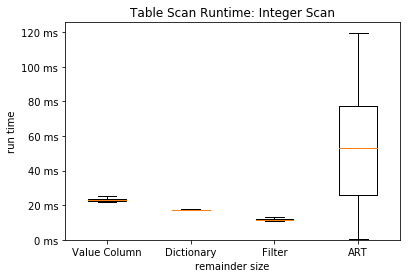

In [57]:
import pandas as pd

value_column_data = []
filter_data = []

data = pd.read_csv('benchmark_results.csv', header=None, names=get_column_names())
art_data = data[data.art == 1]['run_time']
filter_data = data[data.remainder_size == 4]['run_time']
dictionary_data = data[(data.dictionary == 1) & (data.art == 0)]['run_time']
value_column_data = data[(data.remainder_size == 0) & 
                         (data.dictionary == 0) & 
                         (data.btree == 0) & 
                         (data.art == 0)]['run_time']

big_plot(value_column_data, filter_data, dictionary_data, art_data)

#plot_all_groups()
